# PyTorch Gradients

In [1]:
import torch

In [2]:
x = torch.tensor(2.0,requires_grad=True) # sets computational tracking on the tensor

## Back-propogation

In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

In [4]:
y

tensor(63., grad_fn=<AddBackward0>)

In [5]:
y.backward()

In [6]:
x.grad # gradient of y at x=2

tensor(93.)

## Ploting the Tangent

In [7]:
def gradient(x):
    y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1 #equation
    y.backward()
    return y, x.grad

In [8]:
_x, _y, _grad=[], [], []
for i in range(0,100):
    x = torch.tensor(float(i),requires_grad=True)
    y, grad = gradient(x)
    _y.append(y.item())
    _x.append(x.item())
    _grad.append(grad.item())

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gradient')

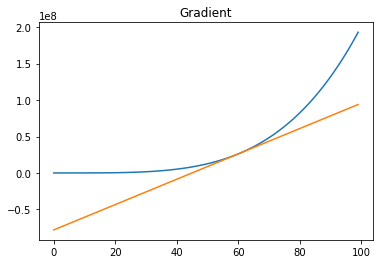

In [10]:
index=60
tangent =[] 

c = _y[index]-_x[index]*_grad[index] # y=mx+c equation of tangent

for i in range(0,100):
    tangent.append(_grad[index]*i+c) # y of points on the tangent

plt.plot(_x, _y)
plt.plot(_x, tangent)
plt.title("Gradient")

## Chain Rule

In [11]:
x = torch.tensor([[1.,2.,3.],[1.,2.,3.]], requires_grad=True) 

In [12]:
x

tensor([[1., 2., 3.],
        [1., 2., 3.]], requires_grad=True)

In [13]:
y = 3*x +2

In [14]:
y

tensor([[ 5.,  8., 11.],
        [ 5.,  8., 11.]], grad_fn=<AddBackward0>)

In [15]:
z = 2*y**2

In [17]:
z

tensor([[ 50., 128., 242.],
        [ 50., 128., 242.]], grad_fn=<MulBackward0>)

In [18]:
out = z.mean()

In [19]:
out

tensor(140., grad_fn=<MeanBackward0>)

In [20]:
out.backward()

In [21]:
x.grad

tensor([[10., 16., 22.],
        [10., 16., 22.]])

z = 2y^2 , y = 3x + 2

z = 18x^2 + 24x + 8

z' = 36x + 24

x=1 , o'(1) = (36 * 1 + 24)/6 = 10

x=2 , o'(2) = (36 * 2 + 24)/6 = 16

x=3 , o'(3) = (36 * 3 + 24)/6 = 22